In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On Met les ventes par canal sur 1 ligne

In [306]:
df = pd.read_csv('ventes_luxe_détaillées.csv', sep=',')

### On cherche pour des erreurs/Na

In [307]:
# Copie initiale pour les lignes supprimées
original_df = df.copy()

# Vérification des dates
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Les valeurs invalides deviennent NaT

# Vérification des colonnes numériques
numeric_columns = ["Événement spécial", "Mois", "Année", "Montant des ventes"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Les valeurs invalides deviennent NaN

# Vérification des valeurs dans "Catégorie"
valid_categories = ["Mode", "Accessoires", "Parfums", "Joaillerie", "Montres", "Maroquinerie"]
df["Catégorie"] = df["Catégorie"].where(df["Catégorie"].isin(valid_categories), None)  # Remplace les valeurs invalides par None

# Vérification des valeurs dans "Canal de vente"
valid_channels = ["Ventes en ligne", "Boutiques physiques", "Ventes privées", "Grands Magasins"]
df["Canal de vente"] = df["Canal de vente"].where(df["Canal de vente"].isin(valid_channels), None)  # Remplace les valeurs invalides par None

# Identification des lignes invalides
invalid_rows = original_df[~df.notna().all(axis=1)]  # Lignes non valides
valid_rows = df.dropna()  # Lignes valides après nettoyage

# Affichage des lignes supprimées
print("Lignes supprimées :")
print(invalid_rows)

# Affichage des lignes valides
print("\nDataFrame nettoyé :")
print(valid_rows)
df = valid_rows

Lignes supprimées :
                 Date Catégorie Canal de vente  Événement spécial  Mois  \
52584  .2689999999998       NaN            NaN                NaN   NaN   

       Année  Montant des ventes  
52584    NaN                 NaN  

DataFrame nettoyé :
            Date     Catégorie       Canal de vente  Événement spécial  Mois  \
0     2018-01-01          Mode      Ventes en ligne                1.0   1.0   
1     2018-01-01          Mode  Boutiques physiques                1.0   1.0   
2     2018-01-01          Mode       Ventes privées                1.0   1.0   
3     2018-01-01          Mode      Grands Magasins                1.0   1.0   
4     2018-01-01   Accessoires      Ventes en ligne                1.0   1.0   
...          ...           ...                  ...                ...   ...   
61340 2023-12-31       Montres      Grands Magasins                1.0  12.0   
61341 2023-12-31  Maroquinerie      Ventes en ligne                1.0  12.0   
61342 2023-12-31  

In [308]:

df["Jour"] = df["Date"].dt.day
df.rename(columns={"Montant des ventes": "Montant_Ventes"}, inplace=True)
df.rename(columns={"Événement spécial": "Événement_spécial"}, inplace=True)
df.rename(columns={"Canal de vente": "Canal_Vente"}, inplace=True)


df_pivot = df.pivot_table(index=['Date', 'Catégorie', 'Événement_spécial', 'Mois', 'Année', 'Jour'],
                          columns='Canal_Vente', values='Montant_Ventes').reset_index()

# On pivote les colonnes
df_pivot.columns = ['Date', 'Catégorie', 'Événement_spécial', 'Mois', 'Année', 'Jour'] + \
                   ['Montant_' + canal.replace(' ', '_') for canal in df_pivot.columns[6:]]

df_pivot.fillna(0, inplace=True)

# Convert de float a int
montant_cols = [col for col in df_pivot.columns if col.startswith('Montant_Ventes')]
df_pivot[montant_cols] = df_pivot[montant_cols].astype(int)

df_pivot['Mois'] = df_pivot['Mois'].apply(lambda x: f"{x:02}")

# Calculer le jour de la semaine en prenant comme référence que '2018-01-01' est un lundi

df = df_pivot

df['Jour_Semaine'] = (df['Date'] - pd.Timestamp('2018-01-01')).dt.days % 7 + 1

df["Montant_Ventes_Totales"] = df["Montant_Boutiques_physiques"] + df["Montant_Ventes_en_ligne"] + df["Montant_Grands_Magasins"] + df["Montant_Ventes_privées"]

df

,Date,Catégorie,Événement_spécial,Mois,Année,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées,Jour_Semaine,Montant_Ventes_Totales
0,2018-01-01,Accessoires,1.0,1.0,2018.0,1,3037.0800,4325.0400,1630,7759,1,16751.1200
1,2018-01-01,Joaillerie,1.0,1.0,2018.0,1,2375.1240,8362.8960,4696,7728,1,23162.0200
2,2018-01-01,Maroquinerie,1.0,1.0,2018.0,1,2996.7600,3608.7720,4259,3606,1,14470.5320
3,2018-01-01,Mode,1.0,1.0,2018.0,1,5969.7480,7871.2920,6761,3458,1,24060.0400
4,2018-01-01,Montres,1.0,1.0,2018.0,1,2920.0560,2020.9320,7213,2747,1,14900.9880
...,...,...,...,...,...,...,...,...,...,...,...,...
13141,2023-12-31,Joaillerie,1.0,12.0,2023.0,31,8205.8020,5335.8735,2333,7647,7,23521.6755
13142,2023-12-31,Maroquinerie,1.0,12.0,2023.0,31,2901.4845,4469.3255,3104,2663,7,13137.8100
13143,2023-12-31,Mode,1.0,12.0,2023.0,31,1815.7810,8218.6245,4610,5516,7,20160.4055
13144,2023-12-31,Montres,1.0,12.0,2023.0,31,1933.8055,2567.8465,7552,8584,7,20637.6520


In [309]:
# Conversion des colonnes "Mois", "Année" et "Événement_spécial" en float, puis en int
for col in ["Mois", "Année", "Événement_spécial"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype(int)  # Conversion en float puis en int

In [310]:

# Grouper les données par mois et année et calculer la somme des ventes
df_monthly_sales = df.groupby(['Année', 'Mois'])['Montant_Ventes_Totales'].mean().reset_index()


# Evolution des ventes par mois et année

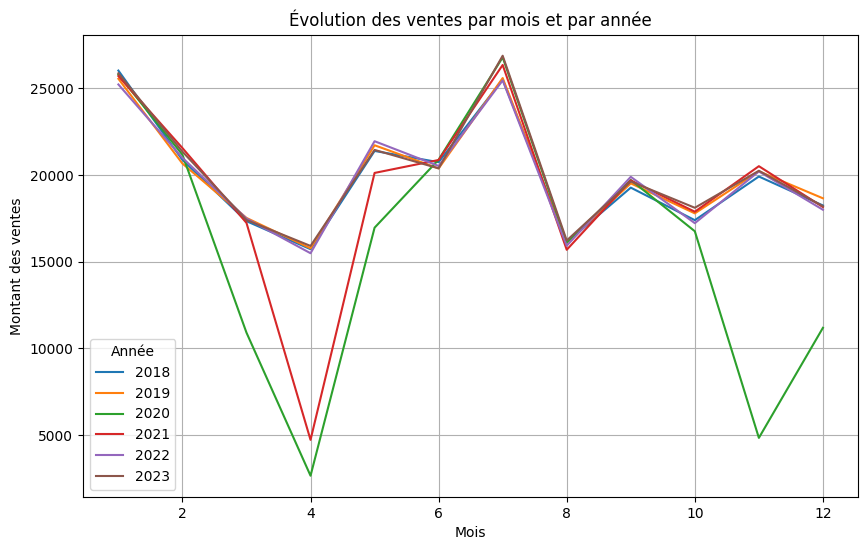

In [311]:
# Créer le graphique
plt.figure(figsize=(10, 6))
for year in df_monthly_sales['Année'].unique():
    data = df_monthly_sales[df_monthly_sales['Année'] == year]
    plt.plot(data['Mois'], data['Montant_Ventes_Totales'], label=str(year))

plt.title("Évolution des ventes par mois et par année")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Année")
plt.grid(True)
plt.show()

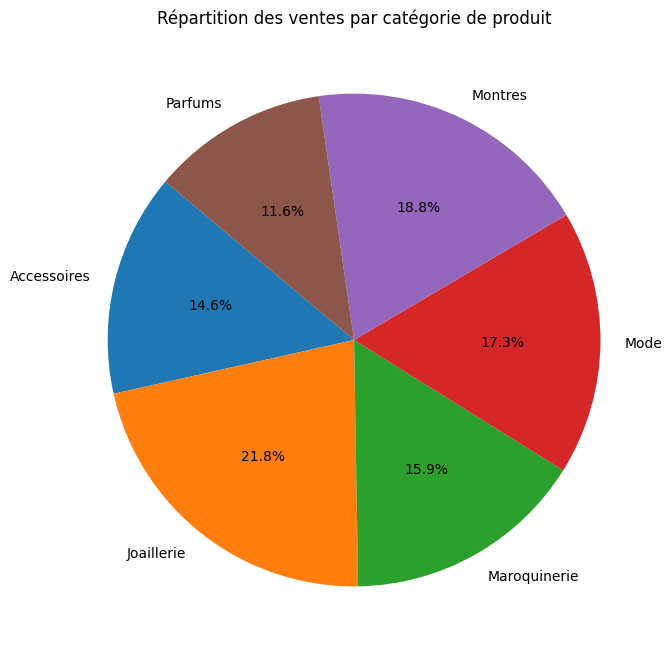

In [312]:
# Calcul de la somme des ventes par catégorie de produit
df_category_sales = df.groupby('Catégorie')['Montant_Ventes_Totales'].mean()

# Création du graphique circulaire
plt.figure(figsize=(10, 8))
plt.pie(df_category_sales, labels=df_category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des ventes par catégorie de produit")
plt.show()

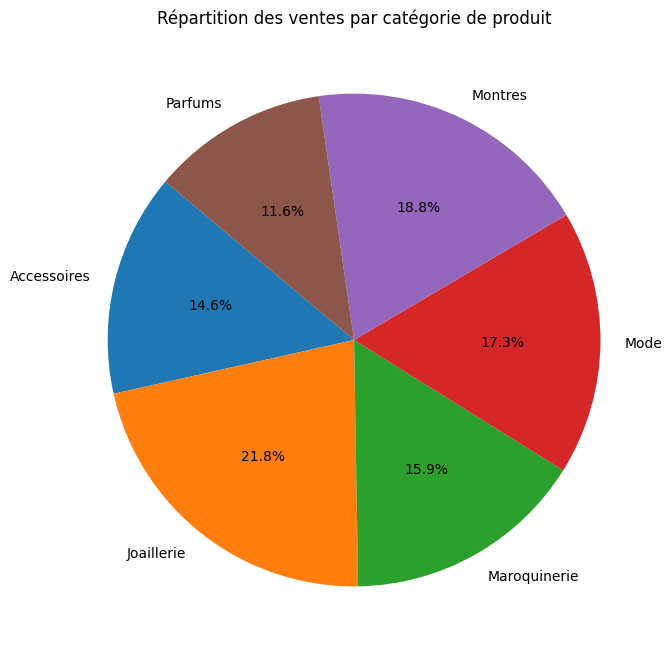

In [313]:
# Calcul de la répartition des ventes par catégorie de produit
sales_by_category = df.groupby('Catégorie')['Montant_Ventes_Totales'].mean()

# Création du diagramme en secteurs
plt.figure(figsize=(8, 8))
sales_by_category.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Répartition des ventes par catégorie de produit")
plt.ylabel("")  # Cache l'étiquette de l'axe y
plt.show()

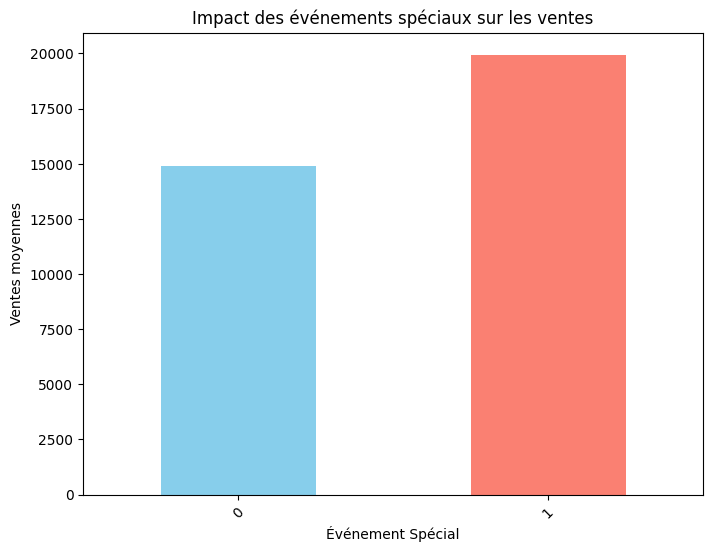

In [314]:
# Calcul des ventes moyennes avec et sans événements spéciaux
df_special_event = df.groupby('Événement_spécial')['Montant_Ventes_Totales'].mean()

# Création du graphique en barres
plt.figure(figsize=(8, 6))
df_special_event.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Impact des événements spéciaux sur les ventes")
plt.xlabel("Événement Spécial")
plt.ylabel("Ventes moyennes")
plt.xticks(rotation=45)
plt.show()

In [315]:
print(df.columns)

Index(['Date', 'Catégorie', 'Événement_spécial', 'Mois', 'Année', 'Jour',
       'Montant_Boutiques_physiques', 'Montant_Grands_Magasins',
       'Montant_Ventes_en_ligne', 'Montant_Ventes_privées', 'Jour_Semaine',
       'Montant_Ventes_Totales'],
      dtype='object')


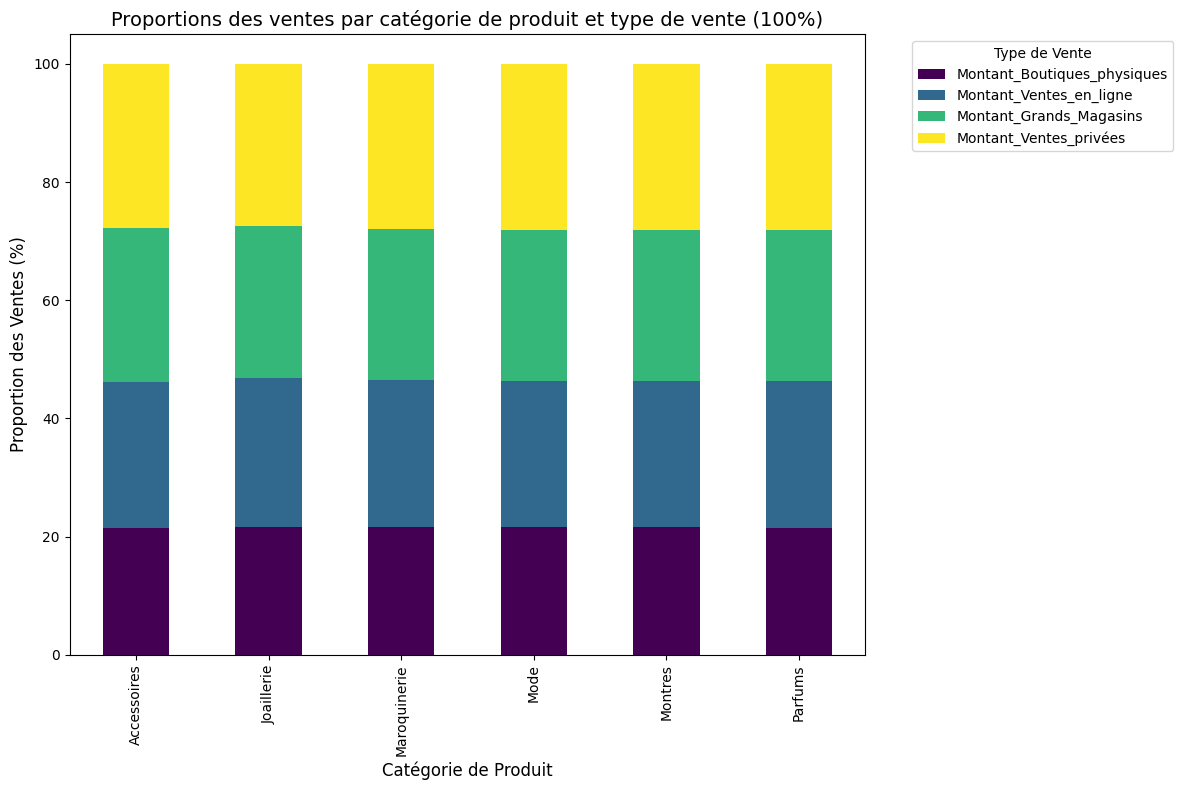

In [316]:
# Calcul des moyennes par catégorie pour les colonnes de ventes
df_somme = df.groupby("Catégorie").mean(numeric_only=True)[[
    "Montant_Boutiques_physiques",
    "Montant_Ventes_en_ligne",
    "Montant_Grands_Magasins",
    "Montant_Ventes_privées",
]]

# Normalisation des données pour obtenir des proportions
df_somme_normalized = df_somme.div(df_somme.sum(axis=1), axis=0) * 100  # Convertir en pourcentage

# Créer le graphique en barres empilées à 100%
ax = df_somme_normalized.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="viridis")

# Ajouter un titre et des labels aux axes
plt.title("Proportions des ventes par catégorie de produit et type de vente (100%)", fontsize=14)
plt.xlabel("Catégorie de Produit", fontsize=12)
plt.ylabel("Proportion des Ventes (%)", fontsize=12)

# Ajouter la légende et afficher le graphique
plt.legend(title="Type de Vente", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [317]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Mois', 'Catégorie'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales

,Mois,Catégorie,Montant_Ventes_Totales
0,1,Accessoires,22536.662860
1,1,Joaillerie,33359.031333
2,1,Maroquinerie,24721.790022
3,1,Mode,26505.286667
4,1,Montres,28835.100882
...,...,...,...
67,12,Joaillerie,22093.118406
68,12,Maroquinerie,16125.622384
69,12,Mode,17690.966543
70,12,Montres,19712.804016


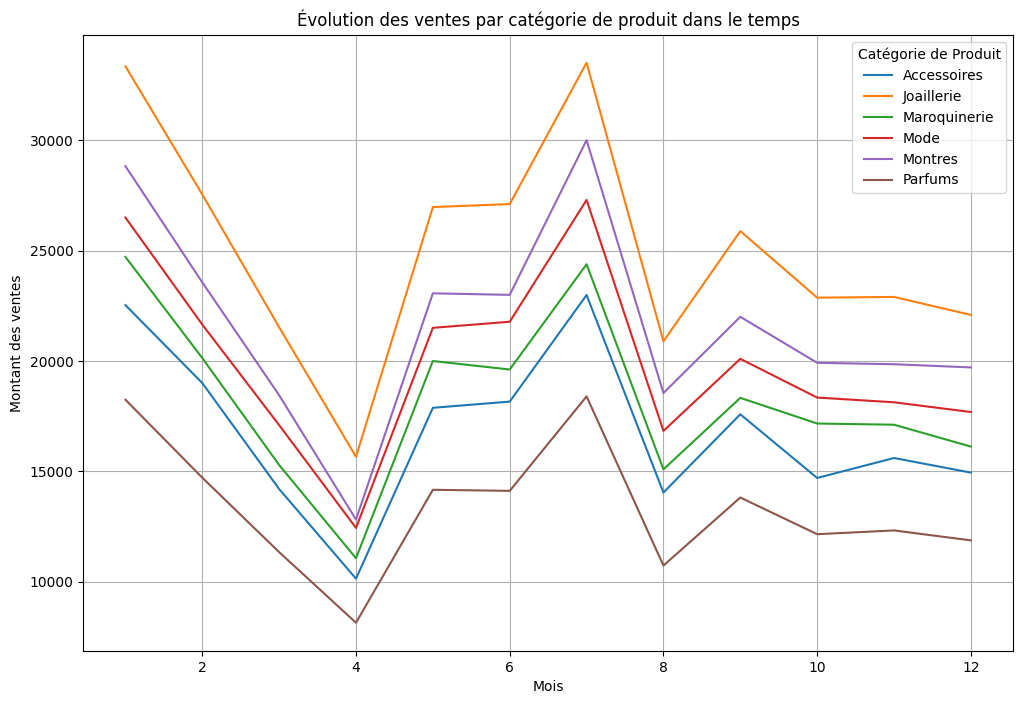

In [318]:
# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie'].unique():
    data = df_category_sales[df_category_sales['Catégorie'] == category]
    plt.plot(data['Mois'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans le temps")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

In [319]:
df

,Date,Catégorie,Événement_spécial,Mois,Année,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées,Jour_Semaine,Montant_Ventes_Totales
0,2018-01-01,Accessoires,1,1,2018,1,3037.0800,4325.0400,1630,7759,1,16751.1200
1,2018-01-01,Joaillerie,1,1,2018,1,2375.1240,8362.8960,4696,7728,1,23162.0200
2,2018-01-01,Maroquinerie,1,1,2018,1,2996.7600,3608.7720,4259,3606,1,14470.5320
3,2018-01-01,Mode,1,1,2018,1,5969.7480,7871.2920,6761,3458,1,24060.0400
4,2018-01-01,Montres,1,1,2018,1,2920.0560,2020.9320,7213,2747,1,14900.9880
...,...,...,...,...,...,...,...,...,...,...,...,...
13141,2023-12-31,Joaillerie,1,12,2023,31,8205.8020,5335.8735,2333,7647,7,23521.6755
13142,2023-12-31,Maroquinerie,1,12,2023,31,2901.4845,4469.3255,3104,2663,7,13137.8100
13143,2023-12-31,Mode,1,12,2023,31,1815.7810,8218.6245,4610,5516,7,20160.4055
13144,2023-12-31,Montres,1,12,2023,31,1933.8055,2567.8465,7552,8584,7,20637.6520


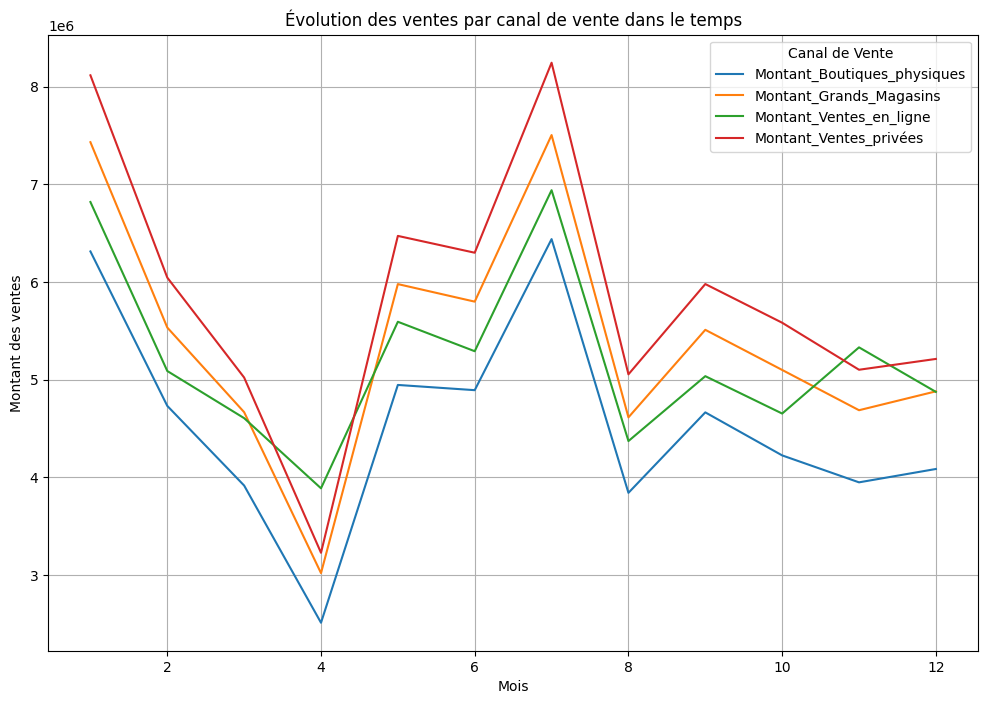

In [320]:
# Calcul des ventes totales par canal de vente pour chaque mois
df_grouped = df.groupby(['Mois']).agg({
    'Montant_Boutiques_physiques': 'sum',
    'Montant_Grands_Magasins': 'sum',
    'Montant_Ventes_en_ligne': 'sum',
    'Montant_Ventes_privées': 'sum'
}).reset_index()

# Créer le graphique en lignes multiples pour chaque canal de vente
plt.figure(figsize=(12, 8))

# Tracer chaque canal de vente
for channel in ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']:
    plt.plot(df_grouped['Mois'], df_grouped[channel], label=channel)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes par canal de vente dans le temps")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Canal de Vente")
plt.grid(True)

# Afficher le graphique
plt.show()

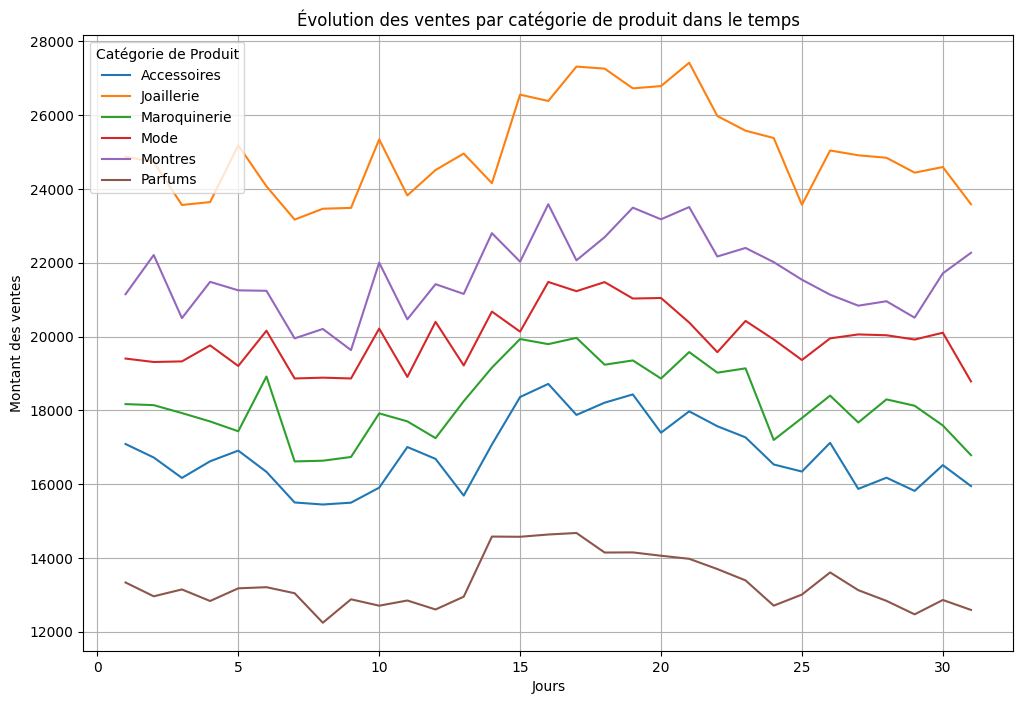

In [321]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Jour', 'Catégorie'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales


# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie'].unique():
    data = df_category_sales[df_category_sales['Catégorie'] == category]
    plt.plot(data['Jour'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans le temps")
plt.xlabel("Jours")
plt.ylabel("Montant des ventes")
plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

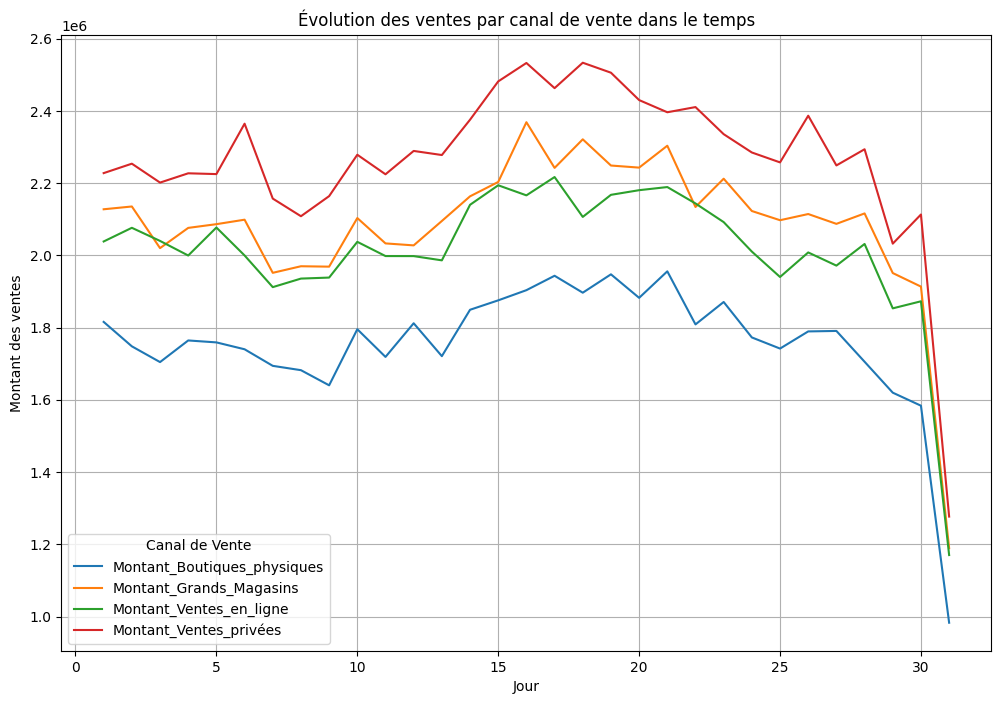

In [ ]:
# Calcul des ventes totales par canal de vente pour chaque mois
df_grouped = df.groupby(['Jour']).agg({
    'Montant_Boutiques_physiques': 'mean',
    'Montant_Grands_Magasins': 'mean',
    'Montant_Ventes_en_ligne': 'mean',
    'Montant_Ventes_privées': 'mean'
}).reset_index()

# Créer le graphique en lignes multiples pour chaque canal de vente
plt.figure(figsize=(12, 8))

# Tracer chaque canal de vente
for channel in ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']:
    plt.plot(df_grouped['Jour'], df_grouped[channel], label=channel)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes par canal de vente dans le temps")
plt.xlabel("Jour")
plt.ylabel("Montant des ventes")
plt.legend(title="Canal de Vente")
plt.grid(True)

# Afficher le graphique
plt.show()

In [323]:
df_grouped

,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées
0,1,1.815859e+06,2.127777e+06,2038613,2227921
1,2,1.748217e+06,2.135488e+06,2076481,2254040
2,3,1.704586e+06,2.020196e+06,2040119,2201678
3,4,1.764491e+06,2.076221e+06,1999720,2227413
4,5,1.759121e+06,2.086536e+06,2077249,2225216
5,6,1.740073e+06,2.098924e+06,1999884,2364801
6,7,1.694185e+06,1.951797e+06,1912166,2157377
7,8,1.682170e+06,1.970000e+06,1935822,2108543
8,9,1.640275e+06,1.968884e+06,1938632,2164188
9,10,1.795582e+06,2.103484e+06,2037605,2278785


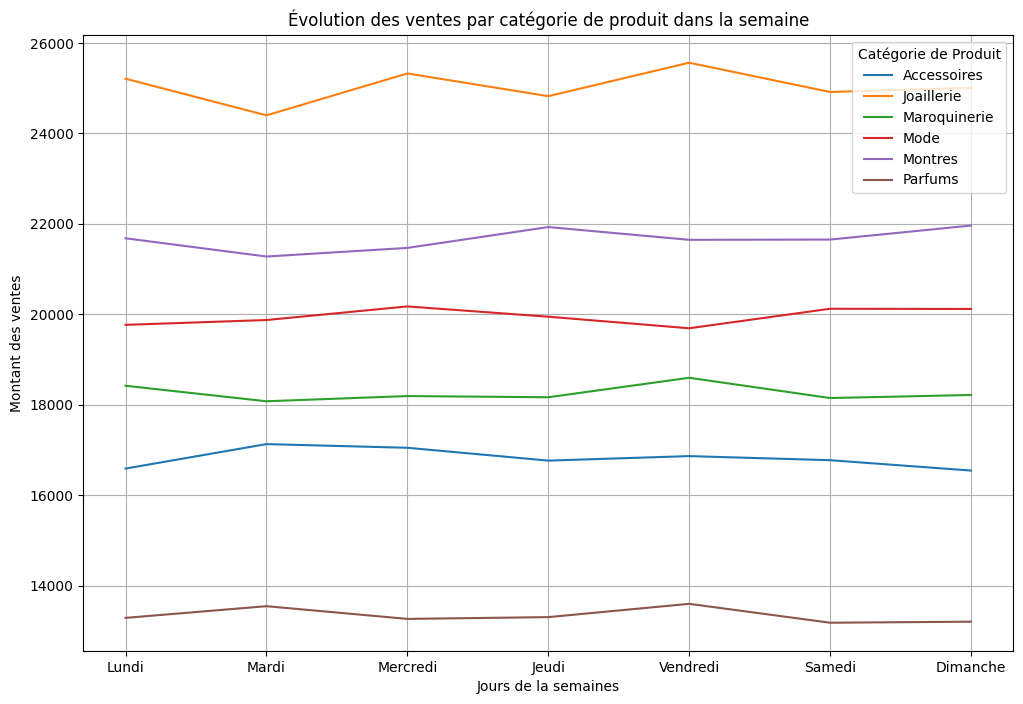

In [324]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Jour_Semaine', 'Catégorie'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales


# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie'].unique():
    data = df_category_sales[df_category_sales['Catégorie'] == category]
    plt.plot(data['Jour_Semaine'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans la semaine")
plt.xlabel("Jours de la semaines")
plt.ylabel("Montant des ventes")

# Personnaliser les ticks de l'axe x avec les noms des jours
jours_semaine = {1: 'Lundi', 2: 'Mardi', 3: 'Mercredi', 4: 'Jeudi', 5: 'Vendredi', 6: 'Samedi', 7: 'Dimanche'}


# plt.xticks(ticks=range(1, 8), labels=df_category_sales['Jour_Semaine'].map(jours_semaine).unique())
plt.xticks(ticks=range(1, 8), labels=[jours_semaine[j] for j in range(1, 8)])

plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

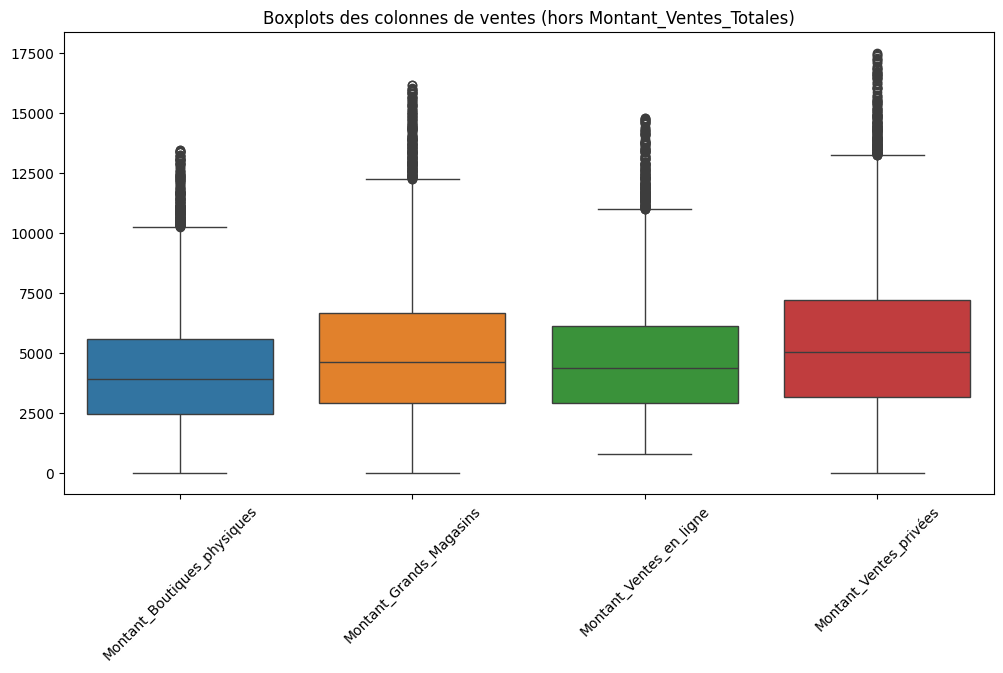

In [325]:
numeric_columns = df.select_dtypes(include='number').drop(columns=['Jour_Semaine', 'Année', 'Événement_spécial','Jour', 'Mois'])

# S,éparer Montant_Ventes_Totales des autres montants de ventes
vente_totale = numeric_columns[['Montant_Ventes_Totales']]
autres_ventes = numeric_columns.drop(columns=['Montant_Ventes_Totales'])

# Création du boxplot pour les colonnes de ventes spécifiques
plt.figure(figsize=(12, 6))
sns.boxplot(data=autres_ventes)
plt.title("Boxplots des colonnes de ventes (hors Montant_Ventes_Totales)")
plt.xticks(rotation=45)
plt.show()


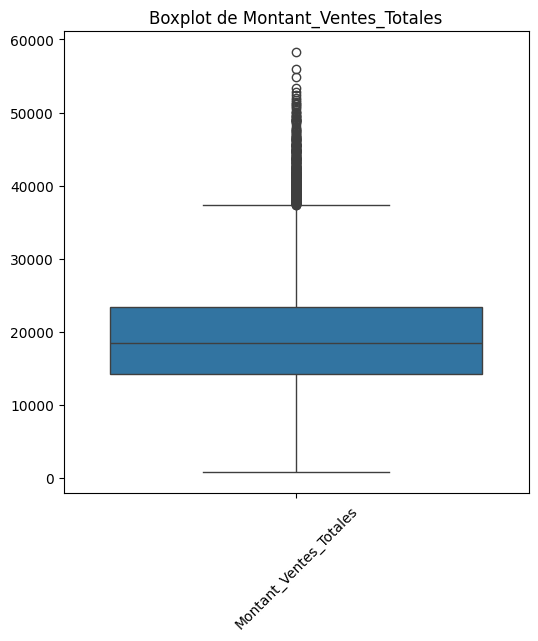

In [326]:

# Création du boxplot pour Montant_Ventes_Totales
plt.figure(figsize=(6, 6))
sns.boxplot(data=vente_totale)
plt.title("Boxplot de Montant_Ventes_Totales")
plt.xticks(rotation=45)
plt.show()

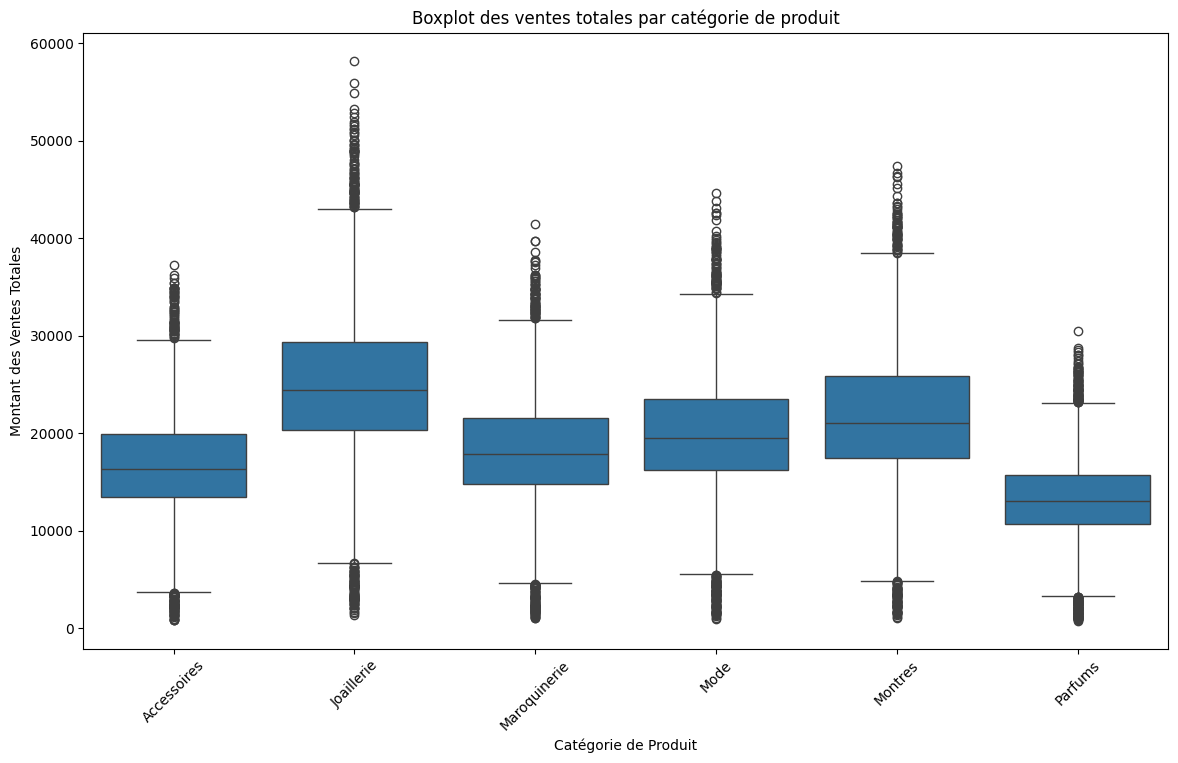

In [327]:
# Créer le boxplot des montants de ventes totales par catégorie de produit
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Catégorie', y='Montant_Ventes_Totales')

# Ajouter un titre et les labels des axes
plt.title("Boxplot des ventes totales par catégorie de produit")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Montant des Ventes Totales")
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()